<a href="https://colab.research.google.com/github/F-Palmieri/PRML_UPC/blob/main/Lab3_1_PossibleSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Try to predict the *Outcom* variabale from the diabates.csv


---



In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [15]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
df = pd.read_csv("gdrive/MyDrive/DB_PRML/diabetes.csv")

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

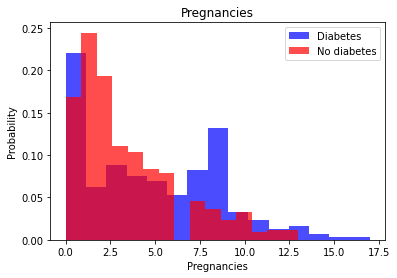

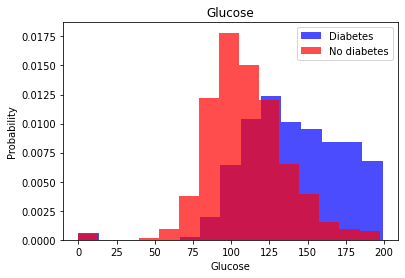

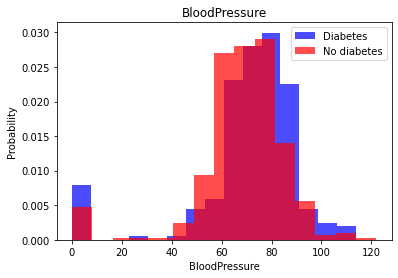

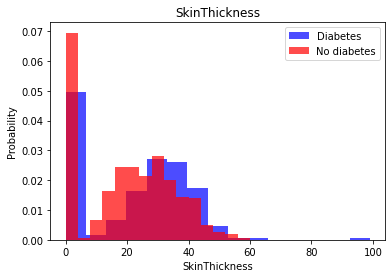

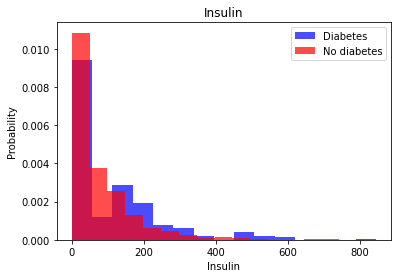

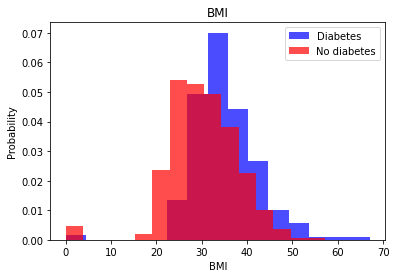

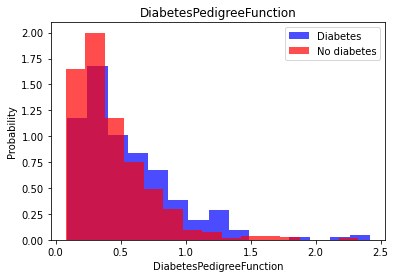

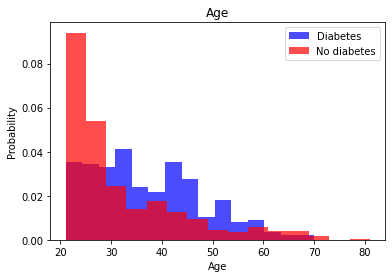

In [19]:
# Some plot 
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='blue', label="Diabetes", alpha=0.7, density=True, bins=15) # To normalise the data
  plt.hist(df[df['Outcome']==0][label], color='red', label="No diabetes", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [21]:
len(df[df["Outcome"]==1]), len(df[df["Outcome"]==0])

(268, 500)

We have unbalanced database with 268 positive and 500 negative patients.
To solve this, we can So we need to *oversample* meaning that we want to increase teh number of handrons by using **RandomOverSampler**. Moreover, we are going to scale the features with **StandardScaler**

In [22]:
X = df[df.columns[:-1]].values #numpy array
y = df[df.columns[-1]].values  #numpy array

Feature scaling

In [57]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1)))) #horizontal stack
transformed_df = pd.DataFrame(data, columns=df.columns)

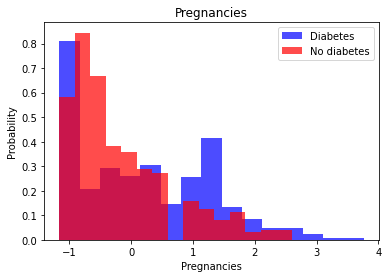

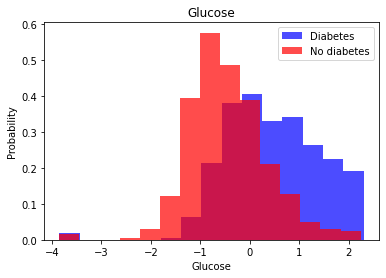

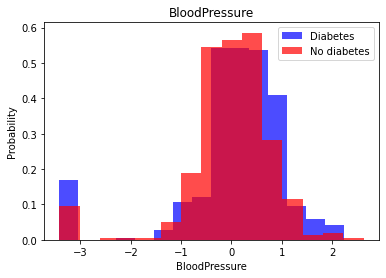

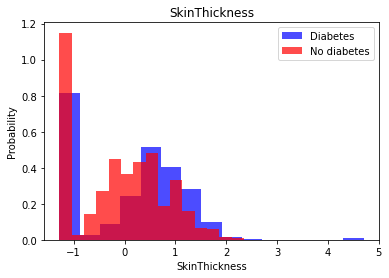

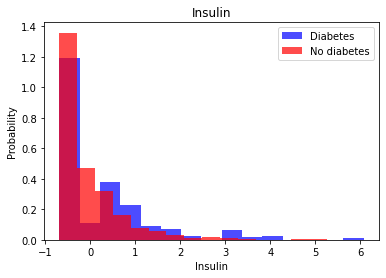

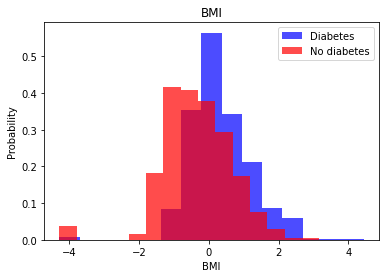

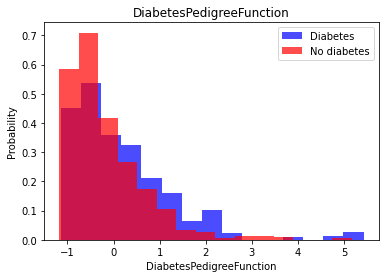

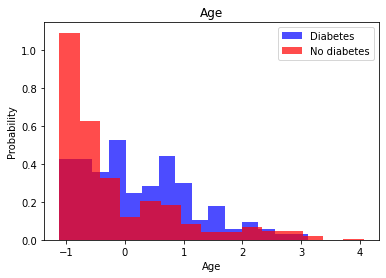

In [58]:
# Plot 
for i in range(len(transformed_df.columns[:-1])):
  label = transformed_df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label], color='blue', label="Diabetes", alpha=0.7, density=True, bins=15) # To normalise the data
  plt.hist(transformed_df[transformed_df['Outcome']==0][label], color='red', label="No diabetes", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [25]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [26]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [27]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0) 
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0) # create the validation and test data set 

**kNN**

In [28]:
from sklearn.neighbors import KNeighborsClassifier # to calssify
from sklearn.metrics import classification_report  # 

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
y_pred = knn_model.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74        97
           1       0.75      0.81      0.78       103

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



**Naive Bayes**

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [35]:
y_pred = nb_model.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78        97
           1       0.82      0.70      0.75       103

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.76       200



**Logistic regression**

Logistic regression is used when your Y variable can take only two values, and if the data is linearly separable, it is more efficient to classify it into two seperate classes

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lg_model = LogisticRegression() #we can change here the penalty which by default is set as l2. This get rid off the outlierrs
lg_model = lg_model.fit(X_train, y_train)

In [39]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77        97
           1       0.79      0.76      0.77       103

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



**Support vector machine (SVM)**

SVMs are used in applications like handwriting recognition, intrusion detection, face detection, email classification, *gene classification*, and in web pages. This is one of the reasons we use SVMs in machine learning. It can handle both classification and regression on linear and non-linear data.

A simple linear SVM classifier works by making a straight line between two classes. That means all of the data points on one side of the line will represent a category and the data points on the other side of the line will be put into a different category. This means there can be an infinite number of lines to choose from.
What makes the linear SVM algorithm better than some of the other algorithms, like k-nearest neighbors, is that it chooses the best line to classify your data points. It chooses the line that separates the data and is the furthest away from the closet data points as possible.

The decision boundary doesn't have to be a line. It's also referred to as a hyperplane because you can find the decision boundary with any number of features, not just two.

ultimately, we want the line that has the largest margins.

SVMs are not robust to outliers

In [40]:
from sklearn.svm import SVC # support vector classifier

In [41]:
SVC_model = SVC()
SVC_model = SVC_model.fit(X_train, y_train)

In [42]:
y_pred = SVC_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74        97
           1       0.75      0.83      0.78       103

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



# Neural Net with Keras

In [56]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, activation="sigmoid") #maps the imnput to a probability of wether or not a patient belong to a class
])

In [50]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [51]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 1s 2ms/step - loss: 4.9627 - accuracy: 0.5683


[4.962672710418701, 0.5683333277702332]

In [52]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 4.2316 - accuracy: 0.5950


[4.231588840484619, 0.5950000286102295]

In [53]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 5ms/step - loss: 4.8320 - accuracy: 0.5750 - val_loss: 4.1234 - val_accuracy: 0.6200
Epoch 2/20
38/38 [==============================] - 0s 4ms/step - loss: 4.7545 - accuracy: 0.5817 - val_loss: 4.1157 - val_accuracy: 0.6100
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 4.7385 - accuracy: 0.5817 - val_loss: 4.0623 - val_accuracy: 0.6100
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 4.7104 - accuracy: 0.5800 - val_loss: 4.0415 - val_accuracy: 0.6100
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 4.6788 - accuracy: 0.5817 - val_loss: 4.0717 - val_accuracy: 0.6100
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 4.6688 - accuracy: 0.5817 - val_loss: 4.0707 - val_accuracy: 0.6100
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 4.6661 - accuracy: 0.5833 - val_loss: 3.9867 - val_accuracy: 0.6100
Epoch 8/20
38/38 [==

In [54]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 4.2051 - accuracy: 0.5950


[4.205096244812012, 0.5950000286102295]